# Prepare environment

In [1]:
# ============ packages
# basic
import pandas as pd 
import numpy as np

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# classification/regression algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

# evaluation 
#import model_evaluation_utils as meu
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Data preprocessing 

In [2]:
# Data acquisition
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep= ';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep= ';')


In [3]:
# Data preparation
# check features, datatypes, missing values
print(data_red.info())
data_red.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data_white.info()
data_white.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# check missing values
data_red.isna().sum()
data_white.isna().sum()

# if, impute missing values in item weight by mean
# df.COLUMN_NAME.fillna(df.COLUMN_NAME.mean(),inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# convert data types
data_red.astype('int64').dtypes
data_white.astype('int64').dtypes

fixed acidity           int64
volatile acidity        int64
citric acid             int64
residual sugar          int64
chlorides               int64
free sulfur dioxide     int64
total sulfur dioxide    int64
density                 int64
pH                      int64
sulphates               int64
alcohol                 int64
quality                 int64
dtype: object

In [7]:
# ==== prepare df: function starts ==== 
def prepare_df(my_df, wine_type_str):
    temp = my_df.copy()
    wine_type = str(wine_type_str) 

    ## add a new column 'wine_type'
    temp['wine_type'] = wine_type

    # rename columns
    temp_col = [item.lower().replace(" ","_") for item in list(temp.columns)]
    temp.columns = temp_col

    # bucket wine quality scores into qualitative quality labels
    temp['wine_quality'] = temp['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # convert datatype
    temp['wine_quality'] = pd.Categorical(temp['wine_quality'],
    categories=['low', 'medium', 'high'])

    my_df_new = temp.copy()
    print(my_df_new.dtypes)

    return my_df_new 
# ==== function ends ==== 

In [8]:
red_wine = prepare_df(data_red, 'red')
red_wine.head()

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
wine_quality            category
dtype: object


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [9]:
white_wine = prepare_df(data_white, 'white')
white_wine.head()

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
wine_quality            category
dtype: object


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [10]:
# combine two dataframes (red_wine) & (white_wine)
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

print(wines.info())
wines.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   ph                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  wine_quality          6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [11]:
# convert datatype     
wines['wine_type'] = pd.Categorical(wines['wine_type'],
categories=['red', 'white'])
wines.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
wine_quality            category
dtype: object

In [15]:
# save combined data as csv
path_out = '../data/wines_prep.csv'
wines.to_csv(path_out) 

# Feature engineering

In [16]:
# load dataset
wines = pd.read_csv('../data/wines_prep.csv', sep=",", index_col=[0])
print(wines.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  wine_quality          6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB
None


In [17]:
print(round(wines.describe(include='all').loc[['mean','count','std','min','max']],2))
wines.head(10)

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
mean            7.22              0.34         0.32            5.44   
count        6497.00           6497.00      6497.00         6497.00   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
max            15.90              1.58         1.66           65.80   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density       ph  \
mean        0.06                30.53                115.74     0.99     3.22   
count    6497.00              6497.00               6497.00  6497.00  6497.00   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  quality wine_type wine_quality  
mean        0.53    10.49 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


In [16]:
# visualization of features (e.g. historgram to check their distribution)
# ref: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn
# ref: https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/
# ref: https://seaborn.pydata.org/tutorial/color_palettes.html

In [18]:
cols_features = wines.iloc[:,:-4].columns
cols_features

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates'],
      dtype='object')

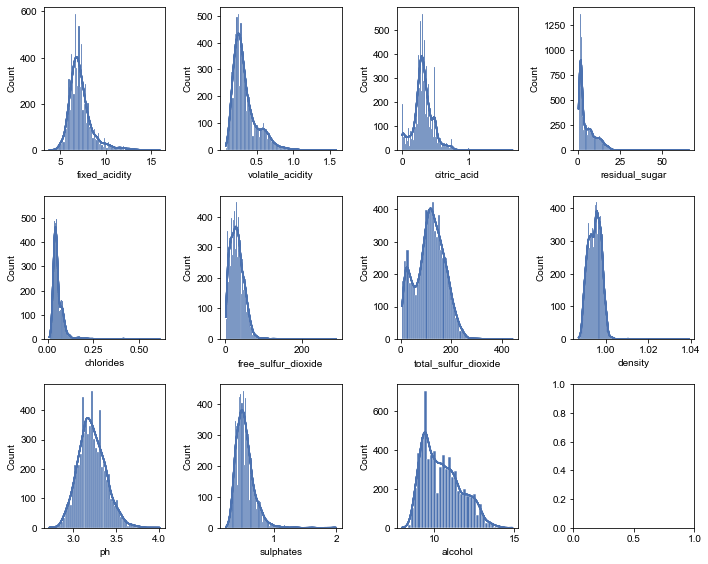

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(10, 8))
sns.set(style="darkgrid")
sns.color_palette("tab10")

for item in cols_features:
    sns.histplot(data=wines, x="fixed_acidity", kde=True, ax=axs[0, 0])
    sns.histplot(data=wines, x="volatile_acidity", kde=True, ax=axs[0, 1])
    sns.histplot(data=wines, x="citric_acid", kde=True, ax=axs[0, 2])
    sns.histplot(data=wines, x="residual_sugar", kde=True, ax=axs[0, 3])
    sns.histplot(data=wines, x="chlorides", kde=True, ax=axs[1, 0])
    sns.histplot(data=wines, x="free_sulfur_dioxide", kde=True, ax=axs[1, 1])
    sns.histplot(data=wines, x="total_sulfur_dioxide", kde=True, ax=axs[1, 2])
    sns.histplot(data=wines, x="density", kde=True, ax=axs[1, 3])
    sns.histplot(data=wines, x="ph", kde=True, ax=axs[2, 0])
    sns.histplot(data=wines, x="sulphates", kde=True, ax=axs[2, 1])
    sns.histplot(data=wines, x="alcohol", kde=True, ax=axs[2, 2])

plt.tight_layout()
plt.show()

# xaxes = cols_features
# yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11']
# titles = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11'] 

# fig, ax = plt.subplots(4,3)
# a = a.ravel()

# for idx,ax in enumerate(a):
#     ax.hist(wines[idx])
#     ax.set_title(titles[idx])
#     ax.set_xlabel(xaxes[idx])
#     ax.set_ylabel(yaxes[idx])


- For general dataset,
    - How should we handle the imbalanced dataset (e.g. red wine 1000 records, white wine 3000 records).
    
- For numeric features,
    - Think about how can we handle the values with right/left-skewed distribution, and missing values. 
    - How each feature is related and how those relations will affect the modeling process; e.g. accuracy of model, parameters in machine learning algorithms.

- For categorical features,
    - Think about when do we need label_encoder, ordinal_encoder, and one_hot_encoder.
    - How to set the order of categorical features, while using ordinal encoder:
        - https://stackoverflow.com/questions/51308994/python-sklearn-determine-the-encoding-order-of-labelencoder
        - https://asktowolrd.com/data-science/difference-between-ordinalencoder-and-labelencoder/
        - https://www.janmeppe.com/notes/machine_learning/preprocessing_structured_data/encode_ordinal_categorical_features/


In [20]:
# Encoding variables

# identify which features need which type of encoder
col_all = list(wines.columns)
col_category = ['wine_type', 'wine_quality']
col_numeric = [x for x in col_all if x not in col_category]
print('categorical featureds:',col_category)
print('numeric features:',col_numeric)

categorical featureds: ['wine_type', 'wine_quality']
numeric features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


In [21]:
# categorical features 
list_feature_ordinal = ['wine_quality']
list_feature_onehot = ['wine_type']


# ====== Function (START) : Encoding variables 
def encode_features(my_df,list_feature_ordinal,list_feature_onehot):
    # category features
    # ordinal encoder
    category_order = [['low','medium','high']]
    ord_enc = OrdinalEncoder(category_order)
    for item in list_feature_ordinal:
        X = my_df[item].to_numpy().reshape(-1,1)
        my_df[item+'_encoded'] = ord_enc.fit_transform(X)
        my_df_ord = pd.DataFrame(my_df[item+'_encoded'], index=my_df.index)
    print(my_df_ord.head())

    # one hot encoder
    one_hot_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    for item in list_feature_onehot:
        X = my_df[item].to_numpy().reshape(-1,1)
        my_df_hot = one_hot_enc.fit_transform(X)
        my_df_hot_enc = pd.DataFrame(my_df_hot, index=my_df.index)
        my_df_hot_enc.columns = one_hot_enc.get_feature_names().tolist()
    print(my_df_hot_enc.head())
    
    # merge dataframes
    my_df_encoded = pd.concat([my_df, my_df_hot_enc], axis=1)

    return my_df_encoded
# ====== Function (END)

In [22]:
wines_encoded = encode_features(wines, list_feature_ordinal, list_feature_onehot)
wines_encoded.head()

   wine_quality_encoded
0                   2.0
1                   0.0
2                   1.0
3                   1.0
4                   1.0
   x0_red  x0_white
0     0.0       1.0
1     1.0       0.0
2     0.0       1.0
3     0.0       1.0
4     0.0       1.0
C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass categories=[['low', 'medium', 'high']] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality,wine_quality_encoded,x0_red,x0_white
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high,2.0,0.0,1.0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low,0.0,1.0,0.0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium,1.0,0.0,1.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium,1.0,0.0,1.0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium,1.0,0.0,1.0


In [23]:
wines_encoded.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
wine_quality             object
wine_quality_encoded    float64
x0_red                  float64
x0_white                float64
dtype: object

In [26]:
# save final data as csv
path_out = '../data/wines_features.csv'
wines_encoded.to_csv(path_out) 

# Model training and evaluation

To see model predictions, continue to: https://github.com/jeonghihi/CAB-data-science/blob/main/python/1_wine/code/wines_modeling-prediction.ipynb
